In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn_custom_mlp import CustomMLPClassifier

In [38]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, val_scores = learning_curve(estimator, X, y, cv=10, scoring='accuracy', n_jobs=8, train_sizes=np.linspace(0.1, 1.0, 25))
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    plt.subplots(1, figsize=(6,4))
    plt.plot(train_sizes, train_mean, color="red",  label="Training score")
    plt.plot(train_sizes, val_mean, color="blue", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="red", alpha=.2)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="blue", alpha=.2)

    plt.title("Learning Curve")
    plt.xlabel("Training Set Size")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

dimensions de X: (100, 2)
dimensions de y: (100,)


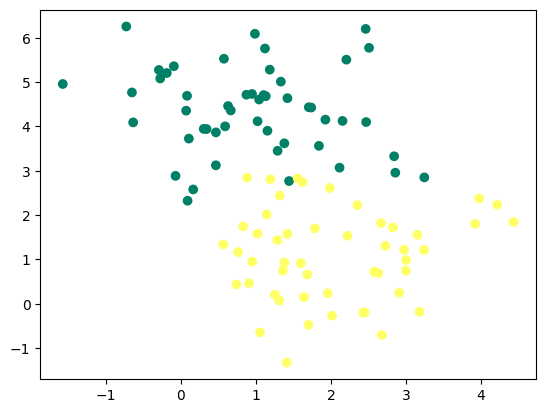

In [39]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
# X, y = make_circles(n_samples=100, noise=0.1, factor=0.3, random_state=0)

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='summer')
plt.show()

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
model = CustomMLPClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [42]:
model.score(X_test, y_test)

0.84

In [43]:
# layers_list = [[1], [1, 1], [1, 1, 1], [8], [8, 8], [8, 8, 8], [16], [16, 16], [16, 16, 16], [32], [32, 32], [32, 32, 32], [128, 128, 128], [256, 256, 256], [64, 64, 64, 64, 64, 64]]
# layers_list = [[1], [1, 1], [1, 1, 1], [8], [8, 8], [8, 8, 8], [16], [16, 16], [16, 16, 16], [32], [32, 32], [32, 32, 32]]
layers_list = [[2], [2, 2], [2, 2, 2], [8], [8, 8], [8, 8, 8], [16], [16, 16], [32], [32, 32]]
# layers_list = [[2], [2, 2], [2, 2, 2], [8], [8, 8]]

In [44]:
def neural_report(X, y, layers_list):
    for i, layers in enumerate(layers_list, start=1):
        model = CustomMLPClassifier(layers)
        train_loss, train_acc = model.fit(X, y, return_fit_report=True)

        print(f"LAYERS {str(layers)} - final loss: {train_loss[-1]} ; final acc: {train_acc[-1]}")

        plt.figure(figsize=(19, 4))
        plt.subplot(1, 3, 1)
        plt.plot(train_loss, label='train loss')
        plt.legend()
        plt.subplot(1, 3, 2)
        plt.plot(train_acc, label='train acc')
        plt.legend()
        train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=10, scoring='accuracy', n_jobs=8, train_sizes=np.linspace(0.1, 1.0, 25))
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)

        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)
        plt.subplot(1, 3, 3)
        plt.plot(train_sizes, train_mean, color="red",  label="Training score")
        plt.plot(train_sizes, val_mean, color="blue", label="Cross-validation score")

        plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="red", alpha=.2)
        plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="blue", alpha=.2)

        plt.title("Learning Curve")
        plt.xlabel("Training Set Size")
        plt.ylabel("Score")
        plt.legend(loc="best")
        plt.tight_layout()
        plt.show()

LAYERS [2] - final loss: 27.87444335483525 ; final acc: 0.91


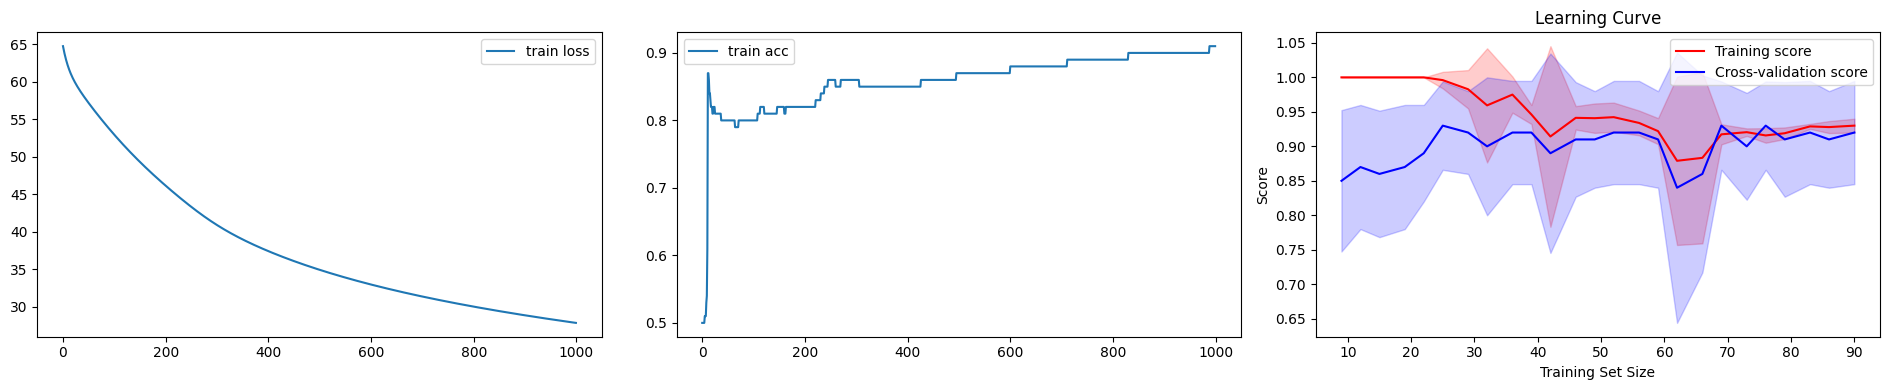

LAYERS [2, 2] - final loss: 67.98884995973033 ; final acc: 0.87


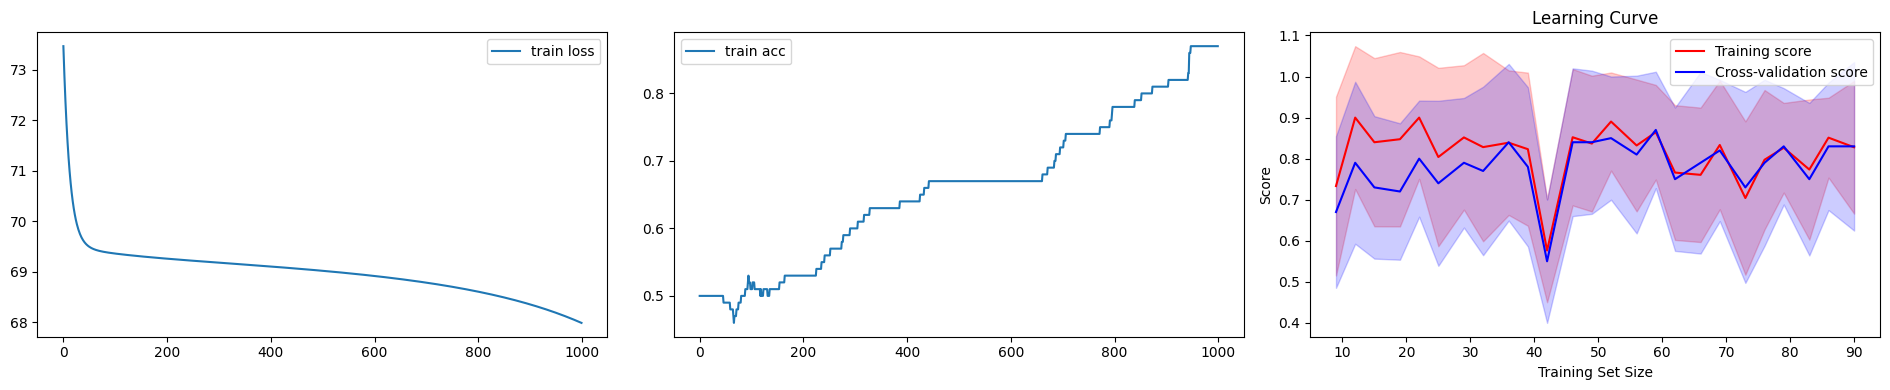

LAYERS [2, 2, 2] - final loss: 69.3126827792797 ; final acc: 0.5


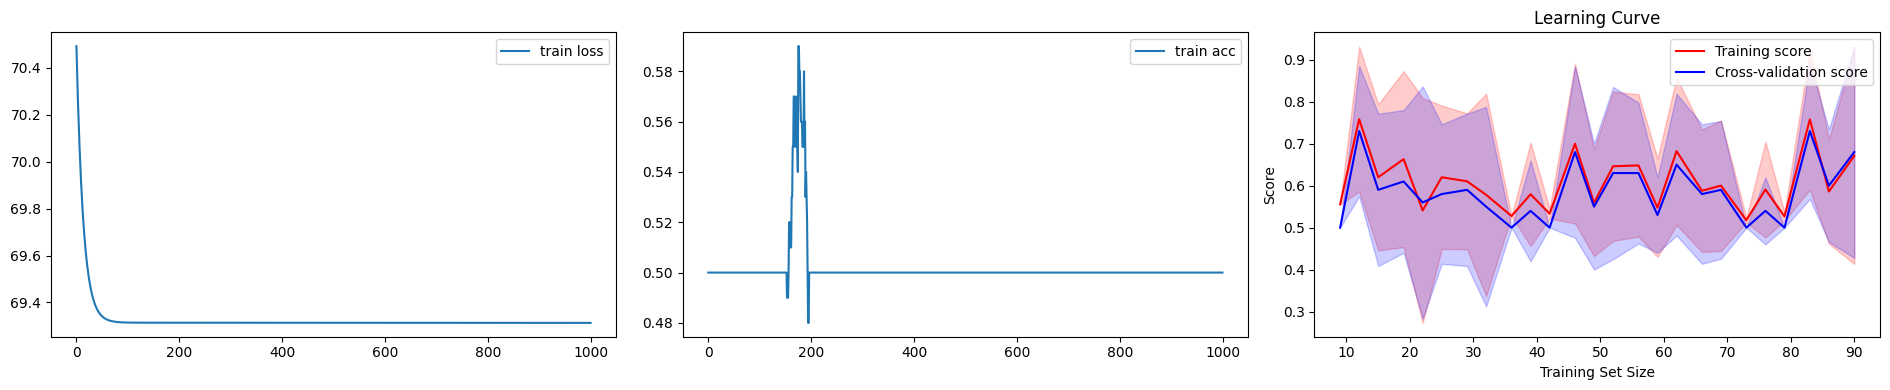

LAYERS [8] - final loss: 12.378046565495051 ; final acc: 0.95


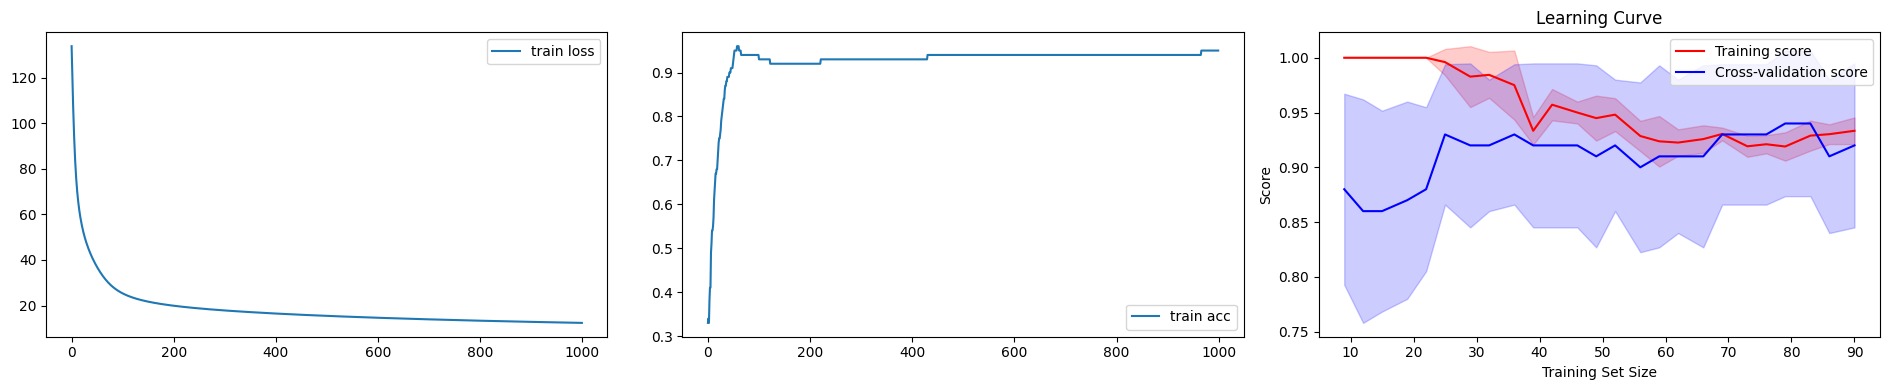

LAYERS [8, 8] - final loss: 15.027112084198551 ; final acc: 0.94


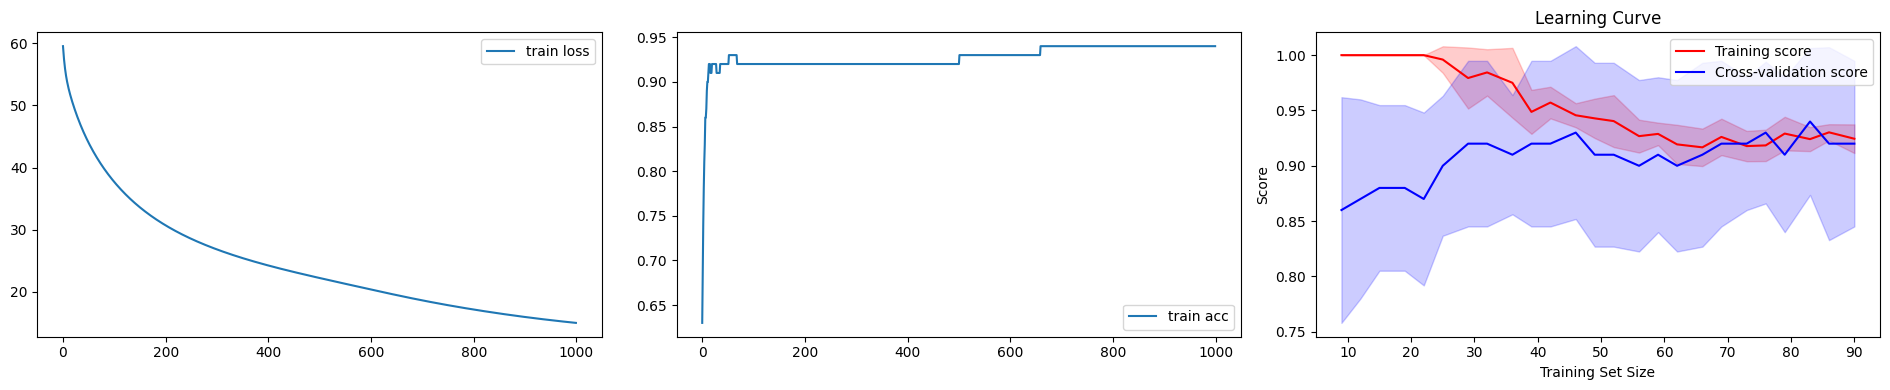

LAYERS [8, 8, 8] - final loss: 38.09196294254446 ; final acc: 0.91


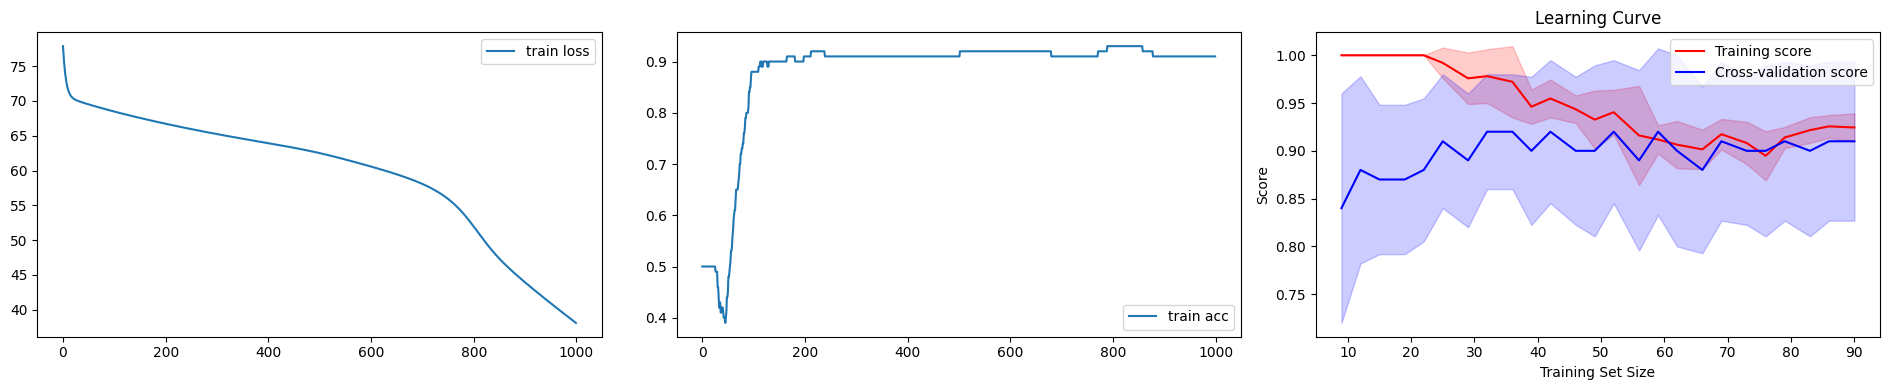

LAYERS [16] - final loss: 12.43549968145049 ; final acc: 0.94


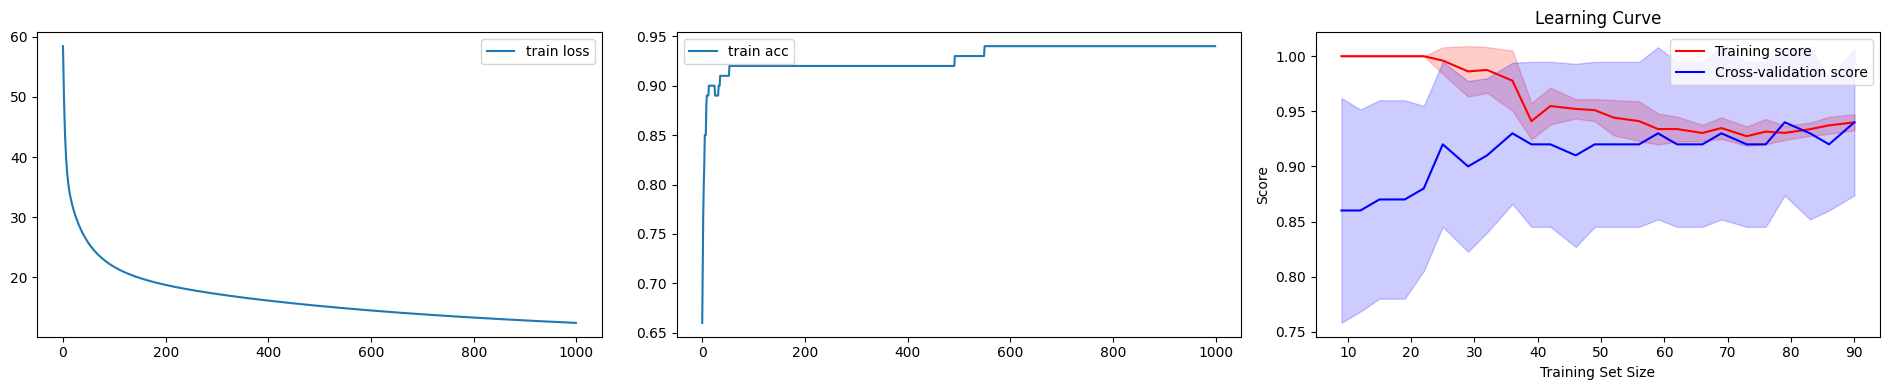

LAYERS [16, 16] - final loss: 11.264350916417936 ; final acc: 0.95


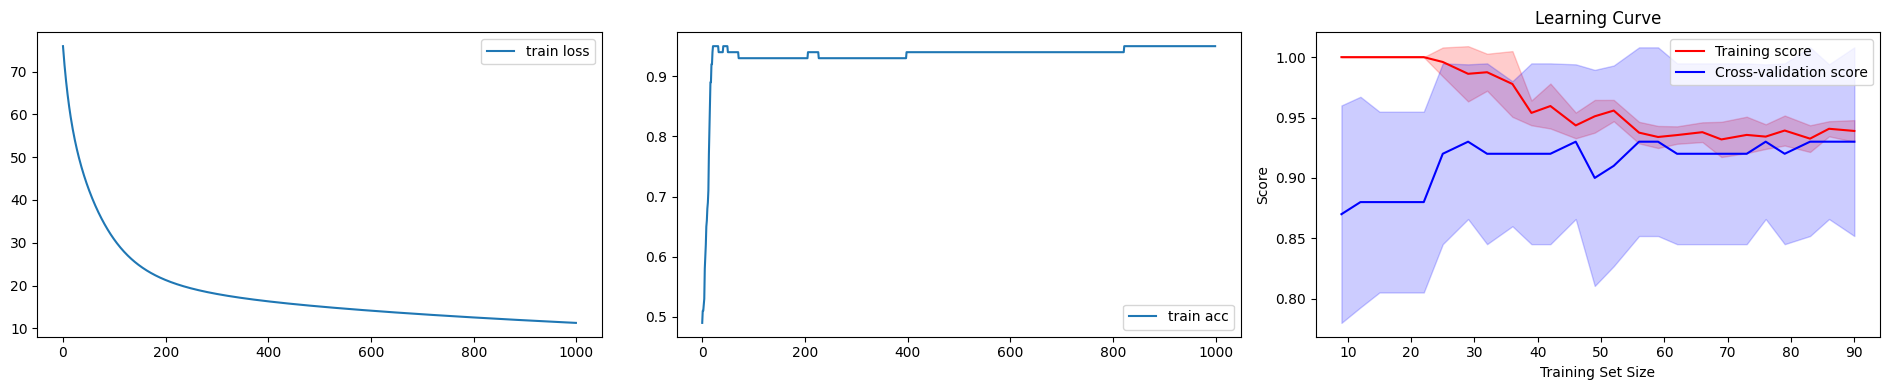

LAYERS [32] - final loss: 11.179626895927907 ; final acc: 0.94


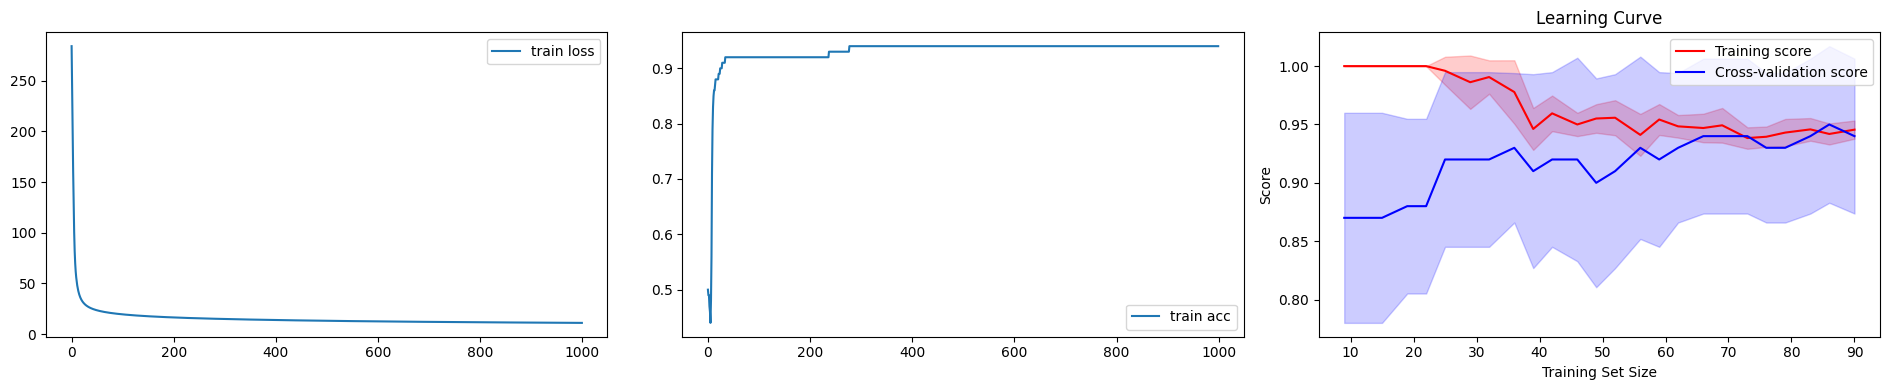

LAYERS [32, 32] - final loss: 9.306714822889118 ; final acc: 0.96


In [45]:
neural_report(X, y, layers_list)

# IRIS

In [46]:
import seaborn as sns

In [47]:
df_iris = sns.load_dataset("iris")

In [48]:
df_iris

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

<Axes: xlabel='petal_length', ylabel='petal_width'>

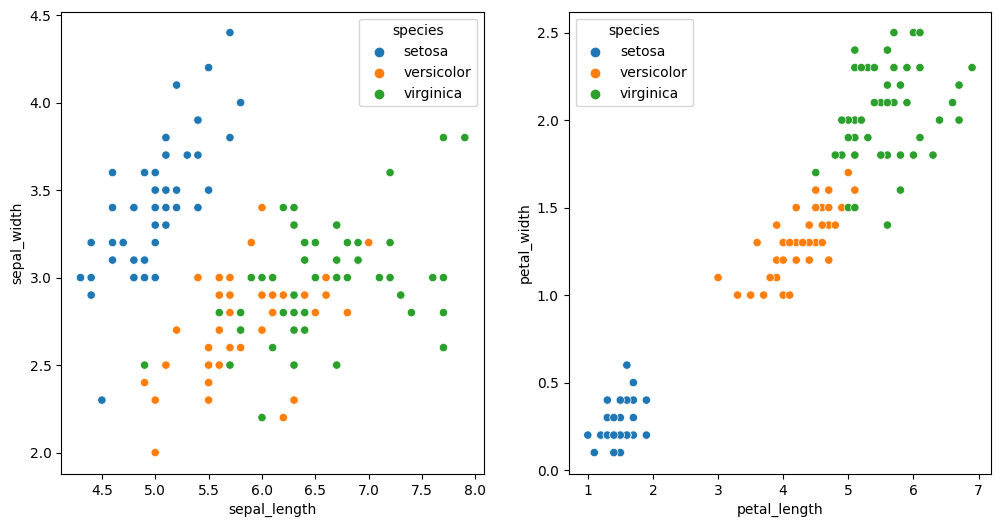

In [49]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(df_iris, x="sepal_length", y="sepal_width", hue="species")
plt.subplot(1, 2, 2)
sns.scatterplot(df_iris, x="petal_length", y="petal_width", hue="species")


In [50]:
X_iris, y_iris = df_iris.drop("species", axis=1), df_iris.species
X_iris_train, X_iris_test, y_iris_train, y_iris_test = train_test_split(X_iris, y_iris)

In [51]:
print("Shapes")
print(f"X_iris_train: {X_iris_train.shape}")
print(f"X_iris_test: {X_iris_test.shape}")
print(f"y_iris_train: {y_iris_train.shape}")
print(f"y_iris_test: {y_iris_test.shape}")

Shapes
X_iris_train: (112, 4)
X_iris_test: (38, 4)
y_iris_train: (112,)
y_iris_test: (38,)


In [52]:
imodel = CustomMLPClassifier([16])
imodel.fit(X_iris_train, y_iris_train)
y_iris_pred = imodel.predict(X_iris_test)
accuracy_score(y_iris_test, y_iris_pred)

0.9736842105263158

In [53]:
res_df = pd.DataFrame({"Prediction": y_iris_pred, "Truth": y_iris_test})
res_df

Prediction       Truth
94   versicolor  versicolor
138   virginica   virginica
0        setosa      setosa
25       setosa      setosa
103   virginica   virginica
1        setosa      setosa
127   virginica   virginica
7        setosa      setosa
4        setosa      setosa
85   versicolor  versicolor
63   versicolor  versicolor
99   versicolor  versicolor
12       setosa      setosa
52   versicolor  versicolor
28       setosa      setosa
113   virginica   virginica
19       setosa      setosa
132   virginica   virginica
22       setosa      setosa
81   versicolor  versicolor
89   versicolor  versicolor
21       setosa      setosa
117   virginica   virginica
42       setosa      setosa
139   virginica   virginica
71   versicolor  versicolor
98   versicolor  versicolor
54   versicolor  versicolor
80   versicolor  versicolor
33       setosa      setosa
32       setosa      setosa
30       setosa      setosa
64   versicolor  versicolor
125   virginica   virginica
47       setosa      setosa
70    virginica  versicolor
5        setosa      setosa
27       setosa      setosa

LAYERS [2] - final loss: 50.723393793554585 ; final acc: 0.6733333333333333


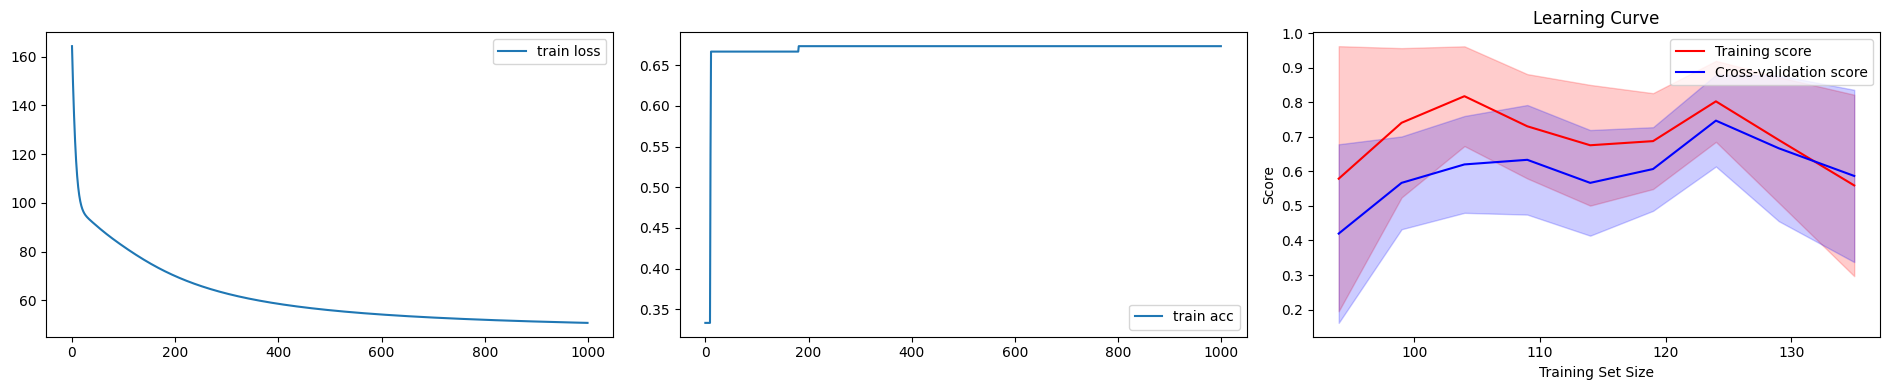

LAYERS [2, 2] - final loss: 53.16410032213555 ; final acc: 0.6733333333333333


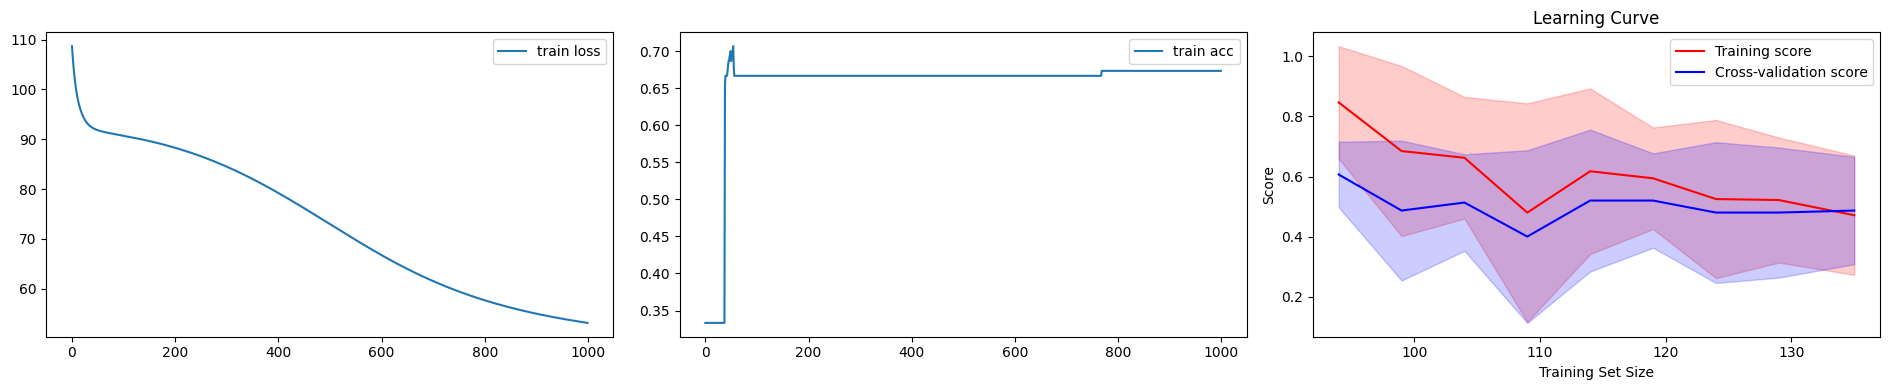

LAYERS [2, 2, 2] - final loss: 95.47986887095706 ; final acc: 0.02666666666666667


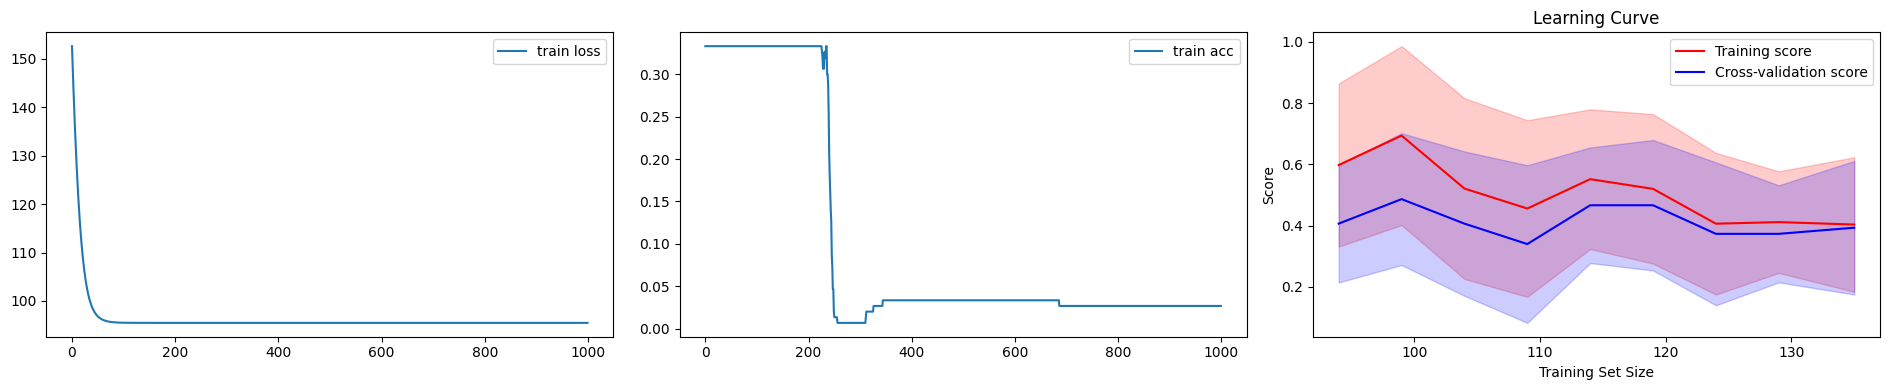

LAYERS [8] - final loss: 23.27402159215061 ; final acc: 0.9733333333333334


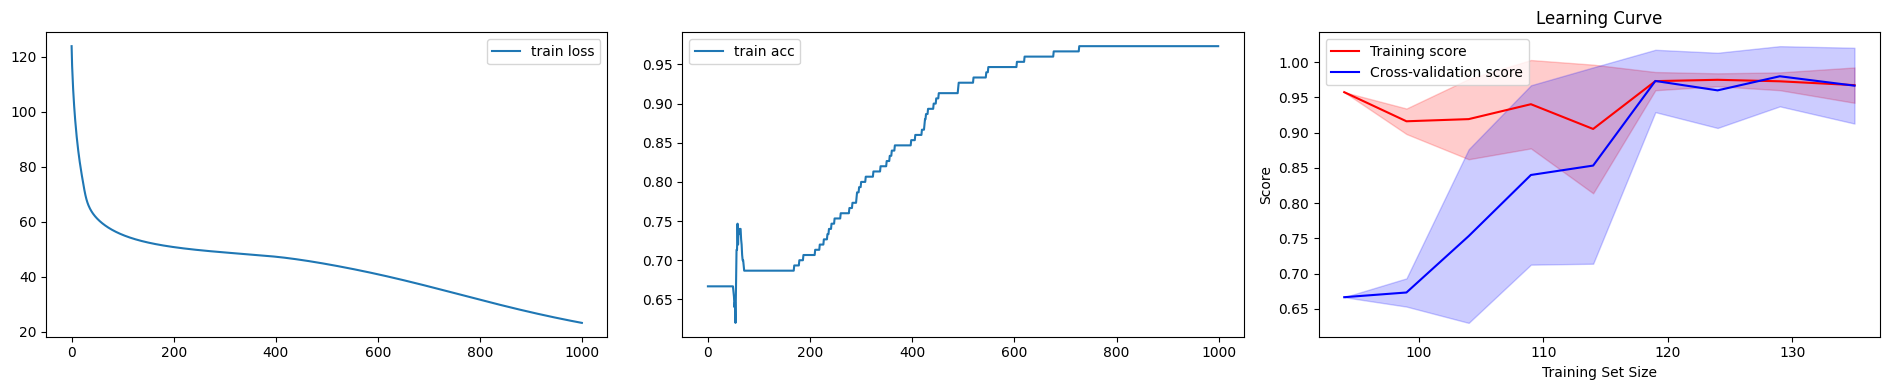

LAYERS [8, 8] - final loss: 29.111304571625077 ; final acc: 0.9733333333333334


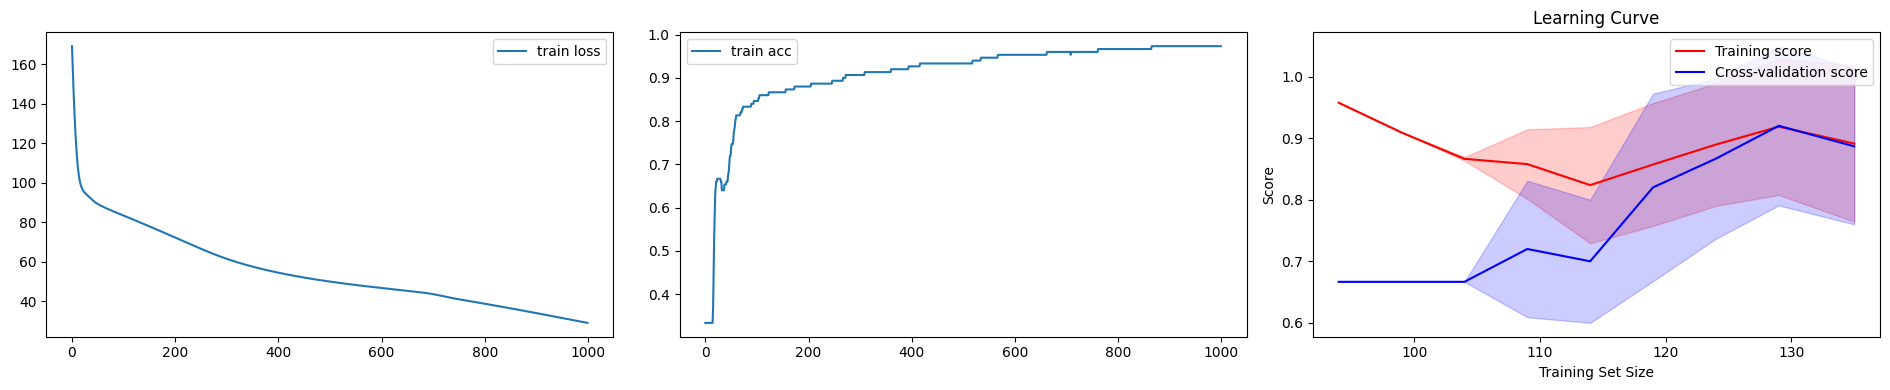

LAYERS [8, 8, 8] - final loss: 51.787931826181854 ; final acc: 0.68


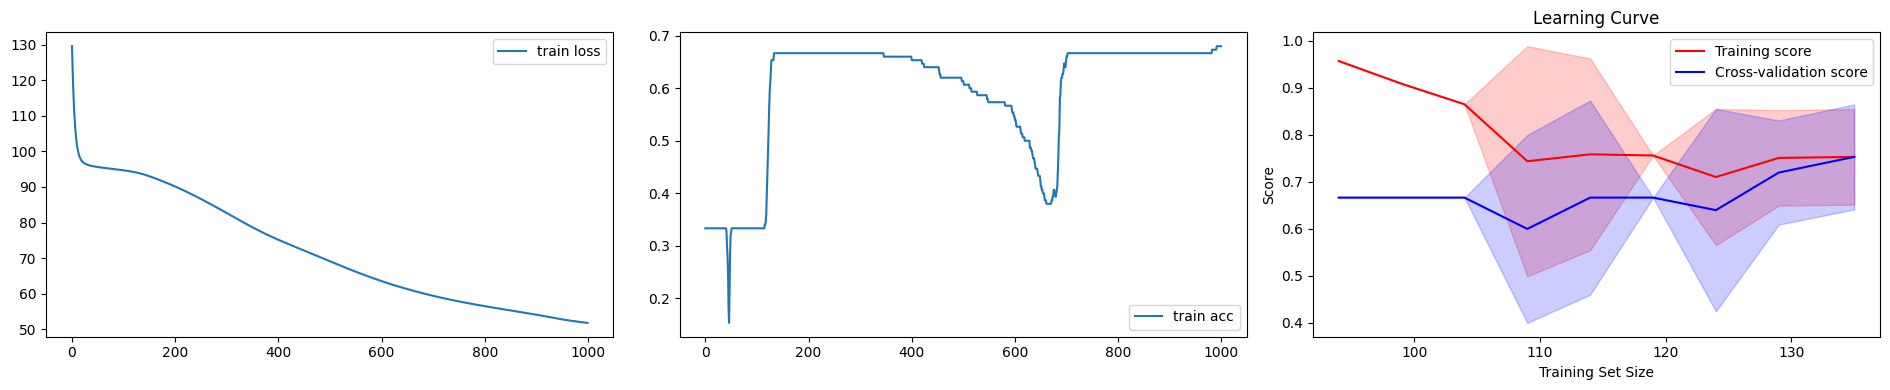

LAYERS [16] - final loss: 14.171824631191805 ; final acc: 0.98


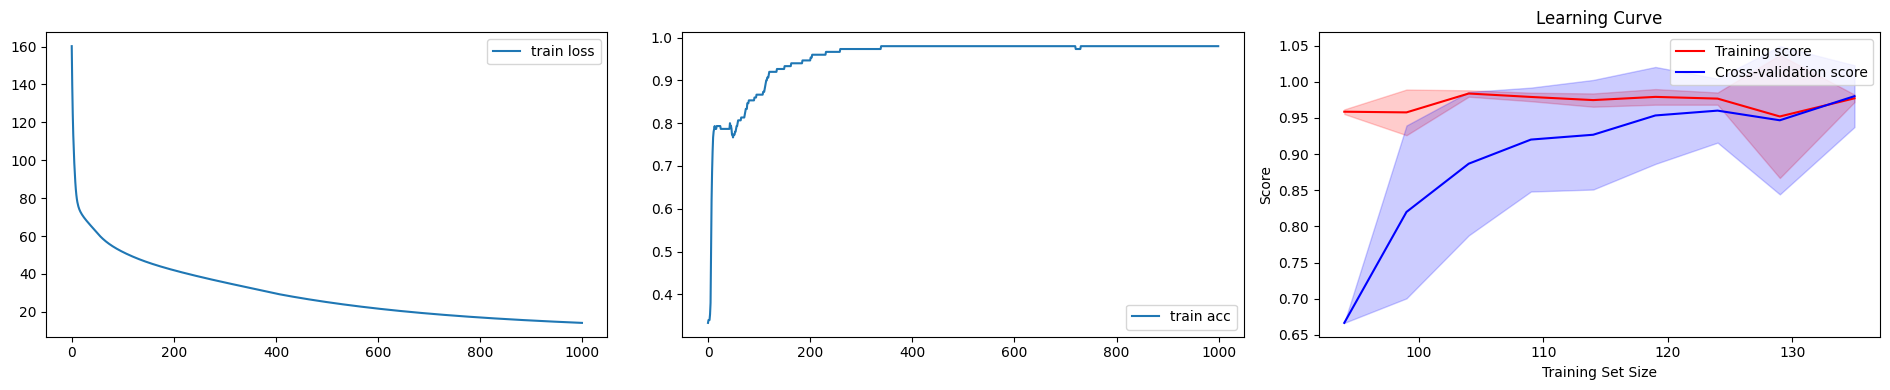

LAYERS [16, 16] - final loss: 17.74795437146335 ; final acc: 0.9866666666666667


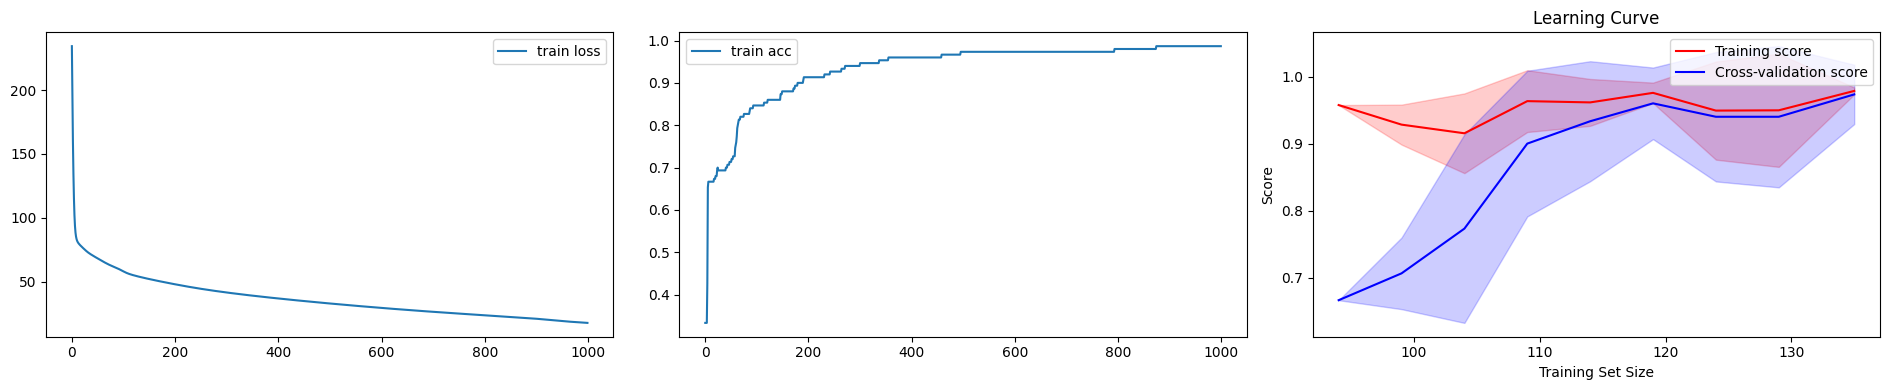

LAYERS [32] - final loss: 12.101965404846618 ; final acc: 0.98


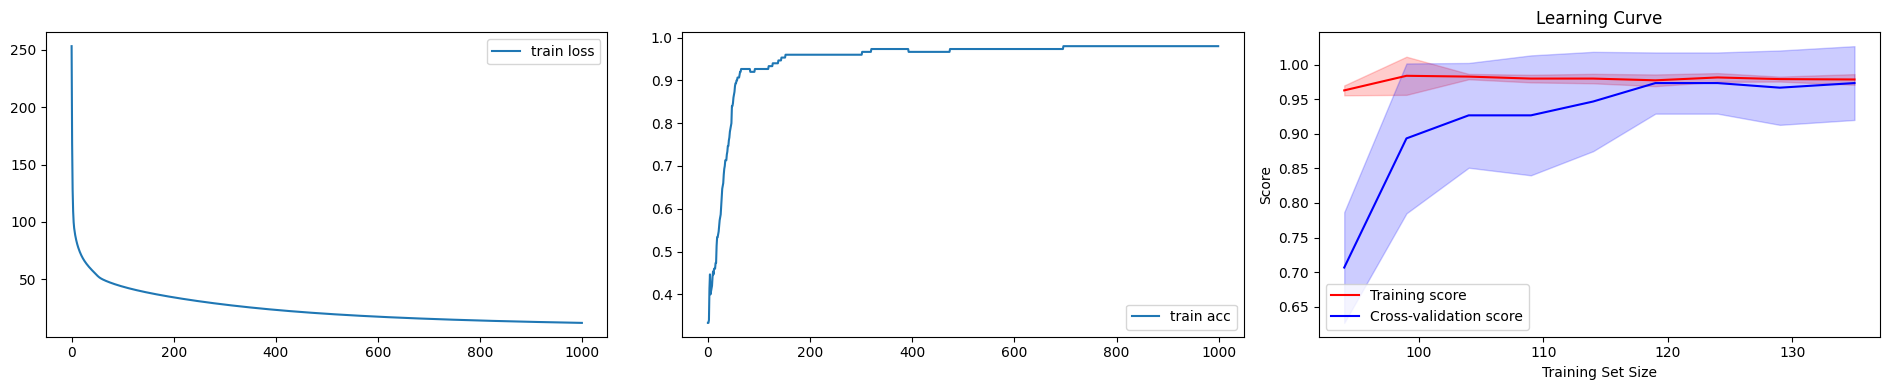

LAYERS [32, 32] - final loss: 9.18803120912223 ; final acc: 0.98


In [54]:
neural_report(X_iris, y_iris, layers_list)